<a href="https://colab.research.google.com/github/napoles-uach/NS-FDTD/blob/master/SoftwareDidacticoSonido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Didáctico escrito para la plataforma Collaborative.
Autor: José Manuel Nápoles Duarte \\
Facultad de Ciencias Químicas de la UACH


# Generación de Tonos y frecuencia de un diapasón
##1 Generación de tono a 440 Hz.
Este Notebook incluye en la primera parte la construcción de las funciones necesarias para generar un tono puro de 440 Hz modulado por una función Gaussiana (la cuál se describe brevemente en el contenido). El sonido tiene una duración de 20 segundos y se visualiza la gráfica  que le corresponde. Así mismo, el tono generado puede ser escuchado usando el atributo "Audio" de la librería Ipython.display.
##2 Espectro de frecuencias de un diapasón a 440 Hz.
Despues de generar de forma matemática el sonido, se procede a incluir un tono natural de un diapasón que vibra a 440 Hz aproximadamente. El sonido es obtenido de la pagina "https://freesound.org/people/lacimarsik/sounds/361922/download/361922__lacimarsik__tuning-fork-a4-440hz.wav", de donde se obtiene de forma libre bajo licencia Creative Commons. El sonido es primero graficado y despues se genera el botón para reproducirlo y verificar que en efecto es el sonido que queremos estudiar. Finalmente, se realiza la transformada de Fourier para identificar las frecuencias y corroborar que la frecuencia más importante en el sonido del diapasón es la de 440 Hz, como se ve por la posición del pico en la gráfica de la transformada de Fourier.



## Generación de tono a 440 Hz.
Primero debemos invocar las librerías.


1.   numpy. Contiene las funciones usadas, como seno, exp, etc. Antes de usar estos elementos se agrega np. al principio, p. ej. np.pi es para invocar pi=3.14159...
2.   matplotlib. La usamos para las gráficaciones. Se invoca con un plt. antes de la función que queremos.
3.   IPython. De esta llamamos solo a la función Audio.

Para visualizar las gráficas se debe agregar la línea "%matplotlib inline"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (Audio)
%matplotlib inline

Definimos la línea de tiempo en la que representaremos los sonidos. En este caso, hacemos un arreglo lineal con np.linspace. \\
Uso: linspace(start, stop, num=número de puntos a generar (default 50)).


*   rate: 16000 Hz para el muestreo del sonido. Son las muestras por segundo.

In [0]:
rate = 16000. # convención para audio en Hz usada en telecomunicaciones
duracion_segundos = 20.0
num_total=rate * duracion_segundos
t = np.linspace(
    0., duracion_segundos, int(num_total))

Creamos una función "wave" que recibe como argumento la frecuencia. \\
Regresa una función tipo: $$\sin(2\pi ft) e^{-\frac{1}{2}\frac{(t-t_0)^2}{\sigma^2}}$$
La cual se conoce como pulso Gaussiano.

In [0]:
def wave(f):
  return np.sin(f * 2. * np.pi * t)*np.exp(-0.5*(t-10.0)**2/2.0**2)

Creamos una función que grafica la función "wave"

In [0]:
def plotx(f):
    x=wave(f)
    plt.plot(t, x)
    plt.show()

Definimos la frecuencia como 440 Hz y graficamos entre 0 y 20 segundos. \\
La gráfica que se genera, representa el sonido que se escuchará más abajo.

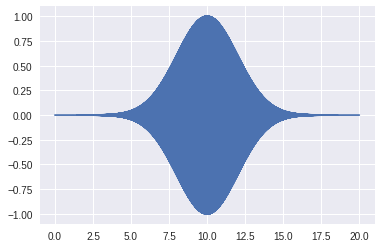

In [108]:
plotx(440)

Ahora construimos la función que generará el audio usando la misma función "wave" que graficamos arriba.

In [0]:
def sonido(f):
    x=wave(f)
    display(Audio(x, rate=rate))

In [110]:
sonido(440)

# Espectro de frecuencias de un diapasón a 440 Hz

In [0]:
archivo_sonido = "fork440hz.wav" #@param {type:"string"}
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile as wav
rate, data = wav.read(archivo_sonido)  

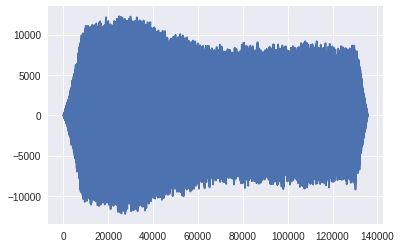

In [112]:
%matplotlib inline
plt.plot(data)
plt.show()

In [113]:

IPython.display.Audio(archivo_sonido)

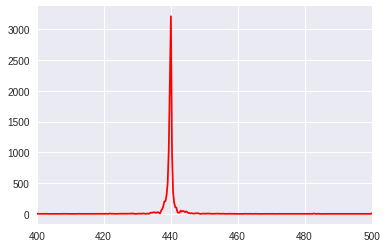

In [114]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
%matplotlib inline
rate, data = wav.read(archivo_sonido)
fft_out = fft(data)
lenx=fft_out.shape[0]

magnitud = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
frecuencias = [(i*1.0/lenx)*rate for i in range(lenx)]
plt.xlim(400,500)
plt.plot(frecuencias, magnitud, 'r')

#Actividad propuesta:
Usando un celular realice una grabación del sonido producido por algún instrumento o de la voz de una persona y suba el archivo .wav a la plataforma de Colaboratory para analizarlo con las instrucciones puestas antes para estudiar el sonido del diapasón. La variable "archivo_sonido" es la que toma el nombre el archivo .wav por lo que basta con cambiarle el nombre al del que se tome para dicho sonido.
Al hacer esto responda las siguientes preguntas.


1.   ¿Las frecuencias obtenidas corresponden a las notas conocidas para el instrumento?
2.   ¿Si grabo voz entonando una nota La, la frecuencia es una sola o aparecen varias?
3.   Generalmente los instrumentos producen varios armónicos y se observarán varios picos. ¿Cual es la relación entre las frecuencias que observa?
4.   ¿Como usaría la primera parte de este material para generar un sonido que se asemeje al sonido que ha grabado?
5.     Con la función sonido genere varios tonos, cada uno a las frecuencias correspondientes a los picos en la gráfica de Fourier y reproduscalos al mismo tiempo. ¿El sonido se parece al de su instrumento?

